In [59]:
import numpy as np
import matplotlib.pyplot as plt
import afterglowpy as grb

# The `afterglowpy` package

This is a demo of the [afterglowpy](https://github.com/geoffryan/afterglowpy), a python package for simulating lightcurves and spectra of GRB afterglow models. 
The notebook puts together a few examples provided by the author. 

The next parameters are taken from the demo script `example/plotLightCurve.py`.

In [60]:
Z = {
    'jetType':     grb.jet.TopHat,     # Top-Hat jet
    'specType':    grb.jet.SimpleSpec, # Basic Synchrotron Emission Spectrum
    'thetaObs':    0.05,   # Viewing angle in radians
    'E0':          1.0e53, # Isotropic-equivalent energy in erg
    'thetaCore':   0.1,    # Half-opening angle in radians
    'n0':          1.0,    # circumburst density in cm^{-3}
    'p':           2.2,    # electron energy distribution index
    'epsilon_e':   0.1,    # epsilon_e
    'epsilon_B':   0.01,   # epsilon_B
    'xi_N':        1.0,    # Fraction of electrons accelerated
    'd_L':         1.0e28, # Luminosity distance in cm
    'z':           0.55,   # redshift
}   

## Lightcurve

The main function here is `fluxDensity`. Here we pass a vector of times and frequencies, as well as the model parameters, and the function outputs a time series vector.

In [77]:
# Space time points geometrically, from 10^3 s to 10^7 s
t = np.geomspace(1.0e3, 1.0e7, 300)

# Set flux in a single X-ray band (all times have same frequency)
nu = np.empty(t.shape)
nu[:] = 1.0e18

# Compute
Fnu = grb.fluxDensity(t, nu, **Z)

In [79]:
Fnu.shape, t.shape, nu.shape

((300,), (300,), (300,))

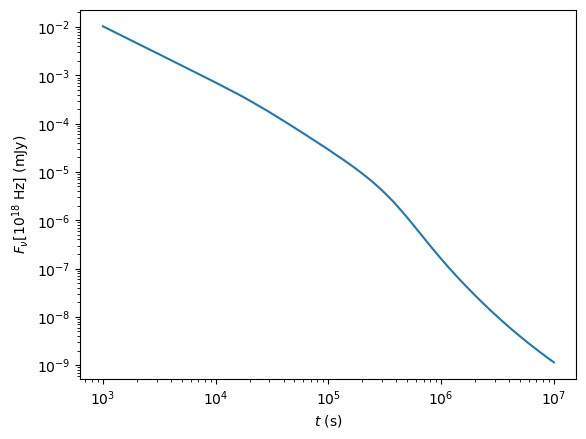

In [80]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, Fnu)
ax.set(xscale='log', xlabel=r'$t$ (s)', yscale='log', ylabel=r'$F_\nu$[$10^{18}$ Hz] (mJy)')
plt.show()

## Spectrum

To get the spectrum at a given time we pass in a scalar for the time.

In [81]:
nua = 1.0e0   # Low Frequencies in Hz
nub = 1.0e20  # High Frequencies in Hz

t = 1.0 * grb.day2sec  # spectrum at 1 day
nu = np.geomspace(nua, nub, num=100)

Fnu = grb.fluxDensity(t, nu, **Z)

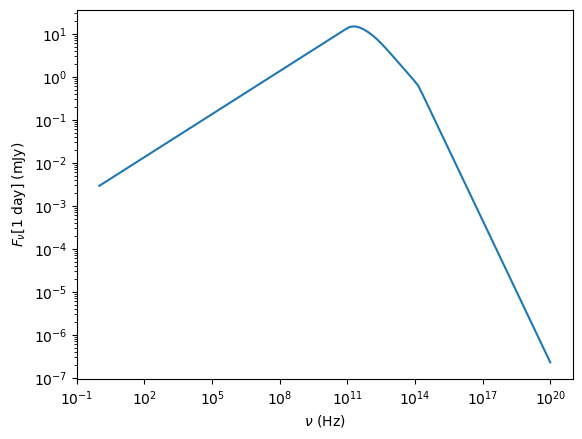

In [64]:
fig, ax = plt.subplots(1, 1)
ax.plot(nu, Fnu)
ax.set(xscale='log', xlabel=r'$\nu$ (Hz)', yscale='log', ylabel=r'$F_\nu$[1 day] (mJy)')
plt.show()

## Multiband

Conversely single or multiband lightcurves are simply achieved by passing in scalars for the frequencies, and a vector for times.

In [74]:
t = np.geomspace(1.0e-1 * grb.day2sec, 1.0e3 * grb.day2sec, num=100)
tday = t * grb.sec2day
bands = {
    # optical
    "U": 8.2e14,
    "G": 6.5e14,
    "R": 4.6e14,
    "I": 3.7e14,
    "Z": 3.3e14,
    "Y": 2.9e14,
    "Radio": 6.0e9, # radio
    "X-ray": 1.0e18,  # x-ray
}


fdens = {label: grb.fluxDensity(t, eff_freq, **Z)for label, eff_freq in bands.items()}

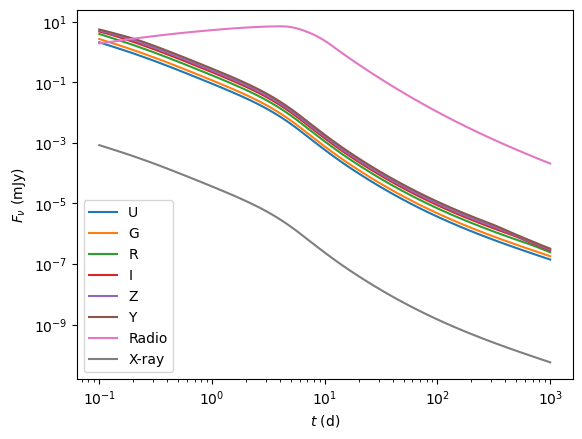

In [75]:
fig, ax = plt.subplots(1, 1)
for label, fden in fdens.items():
    ax.plot(tday, fden, ls='-', label=rf'{label}')
ax.set(xscale='log', xlabel=r'$t$ (d)', yscale='log', ylabel=r'$F_\nu$ (mJy)')
ax.legend()
plt.show()